In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
dataset = pd.read_csv('../Resources/diagnosis-of-covid-19-and-its-clinical-spectrum.csv')
dataset.tail()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
5639,ae66feb9e4dc3a0,3,positive,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,f,f,f,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#drop some of the sparsely populated columns in the end
dataset_new = dataset.drop(columns=["cto2_arterial_blood_gas_analysis", "phosphor", "arteiral_fio2", "po2_arterial_blood_gas_analysis", "hco3_arterial_blood_gas_analysis", "total_co2_arterial_blood_gas_analysis", "ph_arterial_blood_gas_analysis", "base_excess_arterial_blood_gas_analysis","pco2_arterial_blood_gas_analysis", "hb_saturation_arterial_blood_gases", "albumin", "d_dimer", "d_dimer", "lipase_dosage", "arterial_lactic_acid", "ferritin", "creatine_phosphokinase_cpk", "vitamin_b12", "prothrombin_time_pt_activity",
                                   "lactic_dehydrogenase","international_normalized_ratio_inr","relationship_patient_normal", "partial_thromboplastin_time_ptt" ])

dataset_new.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#drop some of the columns that has no important info to offer
dataset_new_2 = dataset_new.drop(columns=["patient_addmited_to_regular_ward_1_yes_0_no","patient_addmited_to_semi_intensive_unit_1_yes_0_no", "patient_addmited_to_intensive_care_unit_1_yes_0_no"])
dataset_new_2.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,...,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color
0,44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# a new dataframe consisting of columns to be encoded

dataset_new_2_encoding = dataset_new_2[["respiratory_syncytial_virus","influenza_a","influenza_b","parainfluenza_1","coronavirusnl63","rhinovirus_enterovirus","coronavirus_hku1","parainfluenza_3","chlamydophila_pneumoniae","adenovirus","parainfluenza_4","coronavirus229e","coronavirusoc43","inf_a_h1n1_2009","bordetella_pertussis","metapneumovirus", "parainfluenza_2", "influenza_b_rapid_test", "influenza_a_rapid_test"]].copy()
dataset_new_2_encoding.head()

,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [80]:
dataset_new_2_encoding_2 = pd.get_dummies(dataset_new_2_encoding,drop_first=True)
dataset_new_2_encoding_2.head()

,respiratory_syncytial_virus_not_detected,influenza_a_not_detected,influenza_b_not_detected,parainfluenza_1_not_detected,coronavirusnl63_not_detected,rhinovirus_enterovirus_not_detected,coronavirus_hku1_not_detected,parainfluenza_3_not_detected,chlamydophila_pneumoniae_not_detected,adenovirus_not_detected,parainfluenza_4_not_detected,coronavirus229e_not_detected,coronavirusoc43_not_detected,inf_a_h1n1_2009_not_detected,bordetella_pertussis_not_detected,metapneumovirus_not_detected,influenza_b_rapid_test_positive,influenza_a_rapid_test_positive
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0


In [81]:
# create another data frame with columns required for x but doesn't need onehotencoding
dataset_new_2_encoding_3 = dataset_new_2[["patient_age_quantile", "neutrophils", "urea", "proteina_c_reativa_mg_dl", "creatinine","potassium","sodium"]].copy()
dataset_new_2_encoding_3.head()

,patient_age_quantile,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium
0,13,NaN,NaN,NaN,NaN,NaN,NaN
1,17,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512
2,8,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN
4,15,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#merge the two above dataframes
dataset_new_2_encoding_merged = pd.concat([dataset_new_2_encoding_3,dataset_new_2_encoding_2], axis=1)
dataset_new_2_encoding_merged.head()

,patient_age_quantile,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,respiratory_syncytial_virus_not_detected,influenza_a_not_detected,influenza_b_not_detected,...,chlamydophila_pneumoniae_not_detected,adenovirus_not_detected,parainfluenza_4_not_detected,coronavirus229e_not_detected,coronavirusoc43_not_detected,inf_a_h1n1_2009_not_detected,bordetella_pertussis_not_detected,metapneumovirus_not_detected,influenza_b_rapid_test_positive,influenza_a_rapid_test_positive
0,13,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [83]:
dataset_new_2_encoding_merged_2 = dataset_new_2_encoding_merged.set_axis(['patient_age_quantile', 'neutrophils', 'urea', 'proteina_c_reativa_mg_dl', 'creatinine', 'potassium', 'sodium', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b_rapid_test', 'influenza_a_rapid_test'], axis=1)
dataset_new_2_encoding_merged_2.head()

,patient_age_quantile,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,respiratory_syncytial_virus,influenza_a,influenza_b,...,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,influenza_b_rapid_test,influenza_a_rapid_test
0,13,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [84]:
# list(dataset) columns
list_X = list(dataset_new_2_encoding_merged_2.columns) 
print(list_X)

['patient_age_quantile', 'neutrophils', 'urea', 'proteina_c_reativa_mg_dl', 'creatinine', 'potassium', 'sodium', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b_rapid_test', 'influenza_a_rapid_test']


In [85]:
# choose 1st model features, mainly based on the blood test features, urine test will be put in 2nd model
X = dataset_new_2_encoding_merged.values
y = dataset_new_2["sars_cov_2_exam_result"].values
print(X)

[[13.                 nan         nan ...  0.          0.
   0.        ]
 [17.         -0.61908603  1.19805908 ...  1.          0.
   0.        ]
 [ 8.                 nan         nan ...  0.          0.
   0.        ]
 ...
 [ 4.                 nan         nan ...  0.          0.
   0.        ]
 [10.                 nan         nan ...  0.          0.
   0.        ]
 [19.          0.38068476  0.45372501 ...  0.          0.
   0.        ]]


In [86]:
print(y)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'positive']


In [87]:
#taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:7])
X[:, 1:7] = imputer.transform(X[:, 1:7])

In [88]:
print(X)

[[ 1.30000000e+01  5.90836121e-09 -6.67526046e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.70000000e+01 -6.19086027e-01  1.19805908e+00 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.00000000e+00  5.90836121e-09 -6.67526046e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.00000000e+00  5.90836121e-09 -6.67526046e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+01  5.90836121e-09 -6.67526046e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.90000000e+01  3.80684763e-01  4.53725010e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [89]:
#encoding variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 1]


In [90]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [91]:
#Scale the data using the MinMaxScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [92]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9160575858250277
Testing Data Score: 0.9061116031886626


In [95]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09388839681133747, R2: 0.9061116031886626


In [96]:
prediction_actual = {
    'Actual': y_test,
    'Prediction': predictions
}

df = pd.DataFrame(prediction_actual)
df = df.set_index('Actual').reset_index()
df.head(100)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,0,0
98,0,0


In [97]:
# list of all the X columns
feature_names = list_X
print(feature_names)

['patient_age_quantile', 'neutrophils', 'urea', 'proteina_c_reativa_mg_dl', 'creatinine', 'potassium', 'sodium', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b_rapid_test', 'influenza_a_rapid_test']


In [98]:
# Determine which features should to be kept
preSelected_features = sorted(zip(model.feature_importances_, feature_names), reverse=True)
ranked_features = pd.DataFrame(preSelected_features, columns=['Score', 'Feature'])
ranked_features = ranked_features.set_index('Feature')
ranked_features

,Score
Feature,
patient_age_quantile,0.285635
neutrophils,0.164737
proteina_c_reativa_mg_dl,0.152739
creatinine,0.088329
urea,0.082307
potassium,0.061199
sodium,0.058397
rhinovirus_enterovirus,0.029408
coronavirusnl63,0.012731


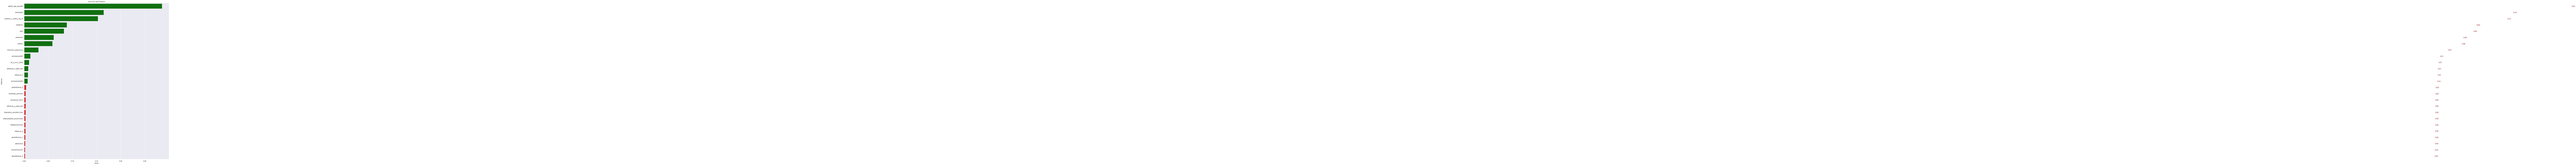

In [130]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 20))

sns.set(style="darkgrid")
sns.set_color_codes("muted")
# Create list of colors based on a condition 
colors = ['red' if (x < 0.004) else 'green' for x in ranked_features['Score']]


# Create barplot 
ax = sns.barplot(data=ranked_features.transpose(), palette=colors, orient='h')

plt.title('score for each feature')
# Set x-axis label
plt.xlabel('score')
# Set y-axis label
plt.ylabel('features')


#ax.fig.set_size_inches(15,15)
# Annotate every single Bar with its value, based on it's width  
for p in ax.patches:
    width = p.get_width()
    if width < 20:
        clr = 'red'
    else:
        clr = 'green'
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),color=clr,
             ha='center', va='center')
    
plt.savefig('plots/scorevsfeature_othertest.png')

In [99]:
# Remove features with lower score
selected_features = []
for tup in preSelected_features:
    if tup[0] > 0.002:
        selected_features.append(tup[1])
print(selected_features)  

['patient_age_quantile', 'neutrophils', 'proteina_c_reativa_mg_dl', 'creatinine', 'urea', 'potassium', 'sodium', 'rhinovirus_enterovirus', 'coronavirusnl63', 'inf_a_h1n1_2009', 'influenza_b_rapid_test', 'influenza_b', 'coronavirus229e', 'parainfluenza_3', 'bordetella_pertussis', 'coronavirus_hku1', 'influenza_a_rapid_test', 'respiratory_syncytial_virus', 'chlamydophila_pneumoniae', 'metapneumovirus', 'influenza_a', 'parainfluenza_1', 'adenovirus']


In [100]:
with open("selected_features_othertests.txt", "w") as output:
    output.write(str(selected_features))

In [101]:
# Use new data for all subsequent models
# Assign new data to X 

X2 = dataset_new_2_encoding_merged_2[selected_features].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X2[:, 1:len(selected_features)])
X2[:, 1:len(selected_features)] = imputer.transform(X2[:, 1:len(selected_features)])
#print(X2)
# split data into training and testing
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size= 0.2, random_state=42)
X2_scaler = StandardScaler().fit(X2_train)
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)
#print(X2_train_scaled)
#print(X2_test_scaled)

In [102]:
print(X2.shape)

(5644, 23)


In [103]:
# Train new model
model2 = RandomForestClassifier(n_estimators=250)
model2.fit(X2_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
print(f"Training Data Score: {model2.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X2_test_scaled, y_test)}")

Training Data Score: 0.9160575858250277
Testing Data Score: 0.9043401240035429


In [105]:
predictions_1 = model2.predict(X2_test_scaled)
MSE_1 = mean_squared_error(y_test, predictions_1)
r2_1 = model2.score(X2_test_scaled, y_test)

print(f"MSE: {MSE_1}, R2: {r2_1}")

MSE: 0.09565987599645705, R2: 0.9043401240035429


In [106]:
# Create the RandomSearchCV model
from sklearn.model_selection import GridSearchCV
model3 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [250, 600, 1200, 1400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [14, 15, 16, 17, 18, None]
}
grid = GridSearchCV(model3, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train the model with GridSearch
grid.fit(X2_train_scaled, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [107]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 14, 'max_features': 'auto', 'n_estimators': 250}
0.9001107419712071


In [108]:
# Tuned parameters
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
criterion = 'entropy'

# Tuned model
tuned_model = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators, 
                                     criterion=criterion, max_depth=max_depth, random_state=42)
tuned_model.fit(X2_train_scaled, y_train)
model_3_training_score = round(tuned_model.score(X2_train_scaled, y_train)*100,3)
tuned_accuracy = round(tuned_model.score(X2_test_scaled, y_test)*100,3)

print(f"Training Data Score: {model_3_training_score} %")
print(f"Testing Data Score: {tuned_accuracy} %")

Training Data Score: 91.185 %
Testing Data Score: 90.7 %


In [109]:
predictions_2 = tuned_model.predict(X2_test_scaled)

prediction_actual_2 = {
    'Actual': y_test,
    'Prediction': predictions_2
}

df2 = pd.DataFrame(prediction_actual_2)
df2 = df2.set_index('Actual').reset_index()
df2.head(100)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,0,0
98,0,0


In [110]:
df2_positive_prediction = df2[df2['Prediction'] == 1]
df2_positive_prediction.head()

,Actual,Prediction
90,1,1
244,1,1
259,0,1
945,1,1
1113,1,1


In [111]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions_2)
tn, fp, fn, tp = confusion_matrix(y_test, predictions_2).ravel()

In [112]:
print ('Confusion Matrix :')
print(tn, fp, fn, tp) 
print ('Accuracy Score :',accuracy_score(y_test, predictions_2) )
print ('Report : ')
print (classification_report(y_test, predictions_2) )

Confusion Matrix :
1020 1 104 4
Accuracy Score : 0.9069973427812223
Report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.80      0.04      0.07       108

    accuracy                           0.91      1129
   macro avg       0.85      0.52      0.51      1129
weighted avg       0.90      0.91      0.87      1129



In [113]:
from confusion_matrix import perf_measure

perf_measure(y_test,predictions_2)

(0.037037037037037035,
 0.9990205680705191,
 0.8,
 0.9074733096085409,
 4,
 1,
 1020,
 104)

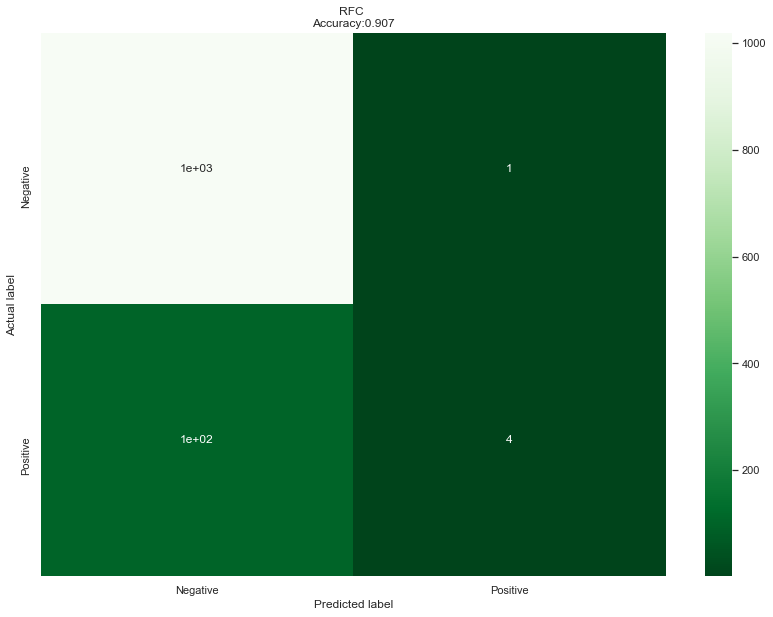

In [128]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_cm(y_test,y_pred,labels):
    # Creates a confusion matrix
    cm = confusion_matrix(y_test, y_pred) # for the tuned model

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                        index = labels, 
                        columns = labels)


    plt.figure(figsize=(14,10))  
    sns.heatmap(cm_df, annot=True, cmap = "Greens_r")
    plt.title('RFC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig('plots/cm_heatmap_othertest.png')
    plt.show()

plot_cm(y_test, predictions_2, ['Negative','Positive'])


In [71]:
#saving the model
# you can you import cPickle as well to save the model
from sklearn.externals import joblib

# Save the trained model to a file 
joblib.dump(tuned_model, 'othertests_RFC_selected_features.pkl')


/Users/arun/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['othertests_RFC_selected_features.pkl']

In [72]:
#loading the model
model_RFC = joblib.load('othertests_RFC_selected_features.pkl')